<a href="https://colab.research.google.com/github/karthisha-13/EXPLAINABLE-AI_2303A52099_LAB/blob/main/EXAI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression Results:
Accuracy: 0.8800
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.92      0.75      0.83        16
           2       0.93      0.93      0.93        43

    accuracy                           0.88        75
   macro avg       0.86      0.85      0.85        75
weighted avg       0.89      0.88      0.88        75

KNN Results:
Accuracy: 0.8533
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.81      0.74        16
           1       0.85      0.69      0.76        16
           2       0.93      0.93      0.93        43

    accuracy                           0.85        75
   macro avg       0.82      0.81      0.81        75
weighted avg       0.86      0.85      0.85        75

SVM Results:
Accuracy: 0.8533
Classification Report:
               precision    recall  f1-score   support

     

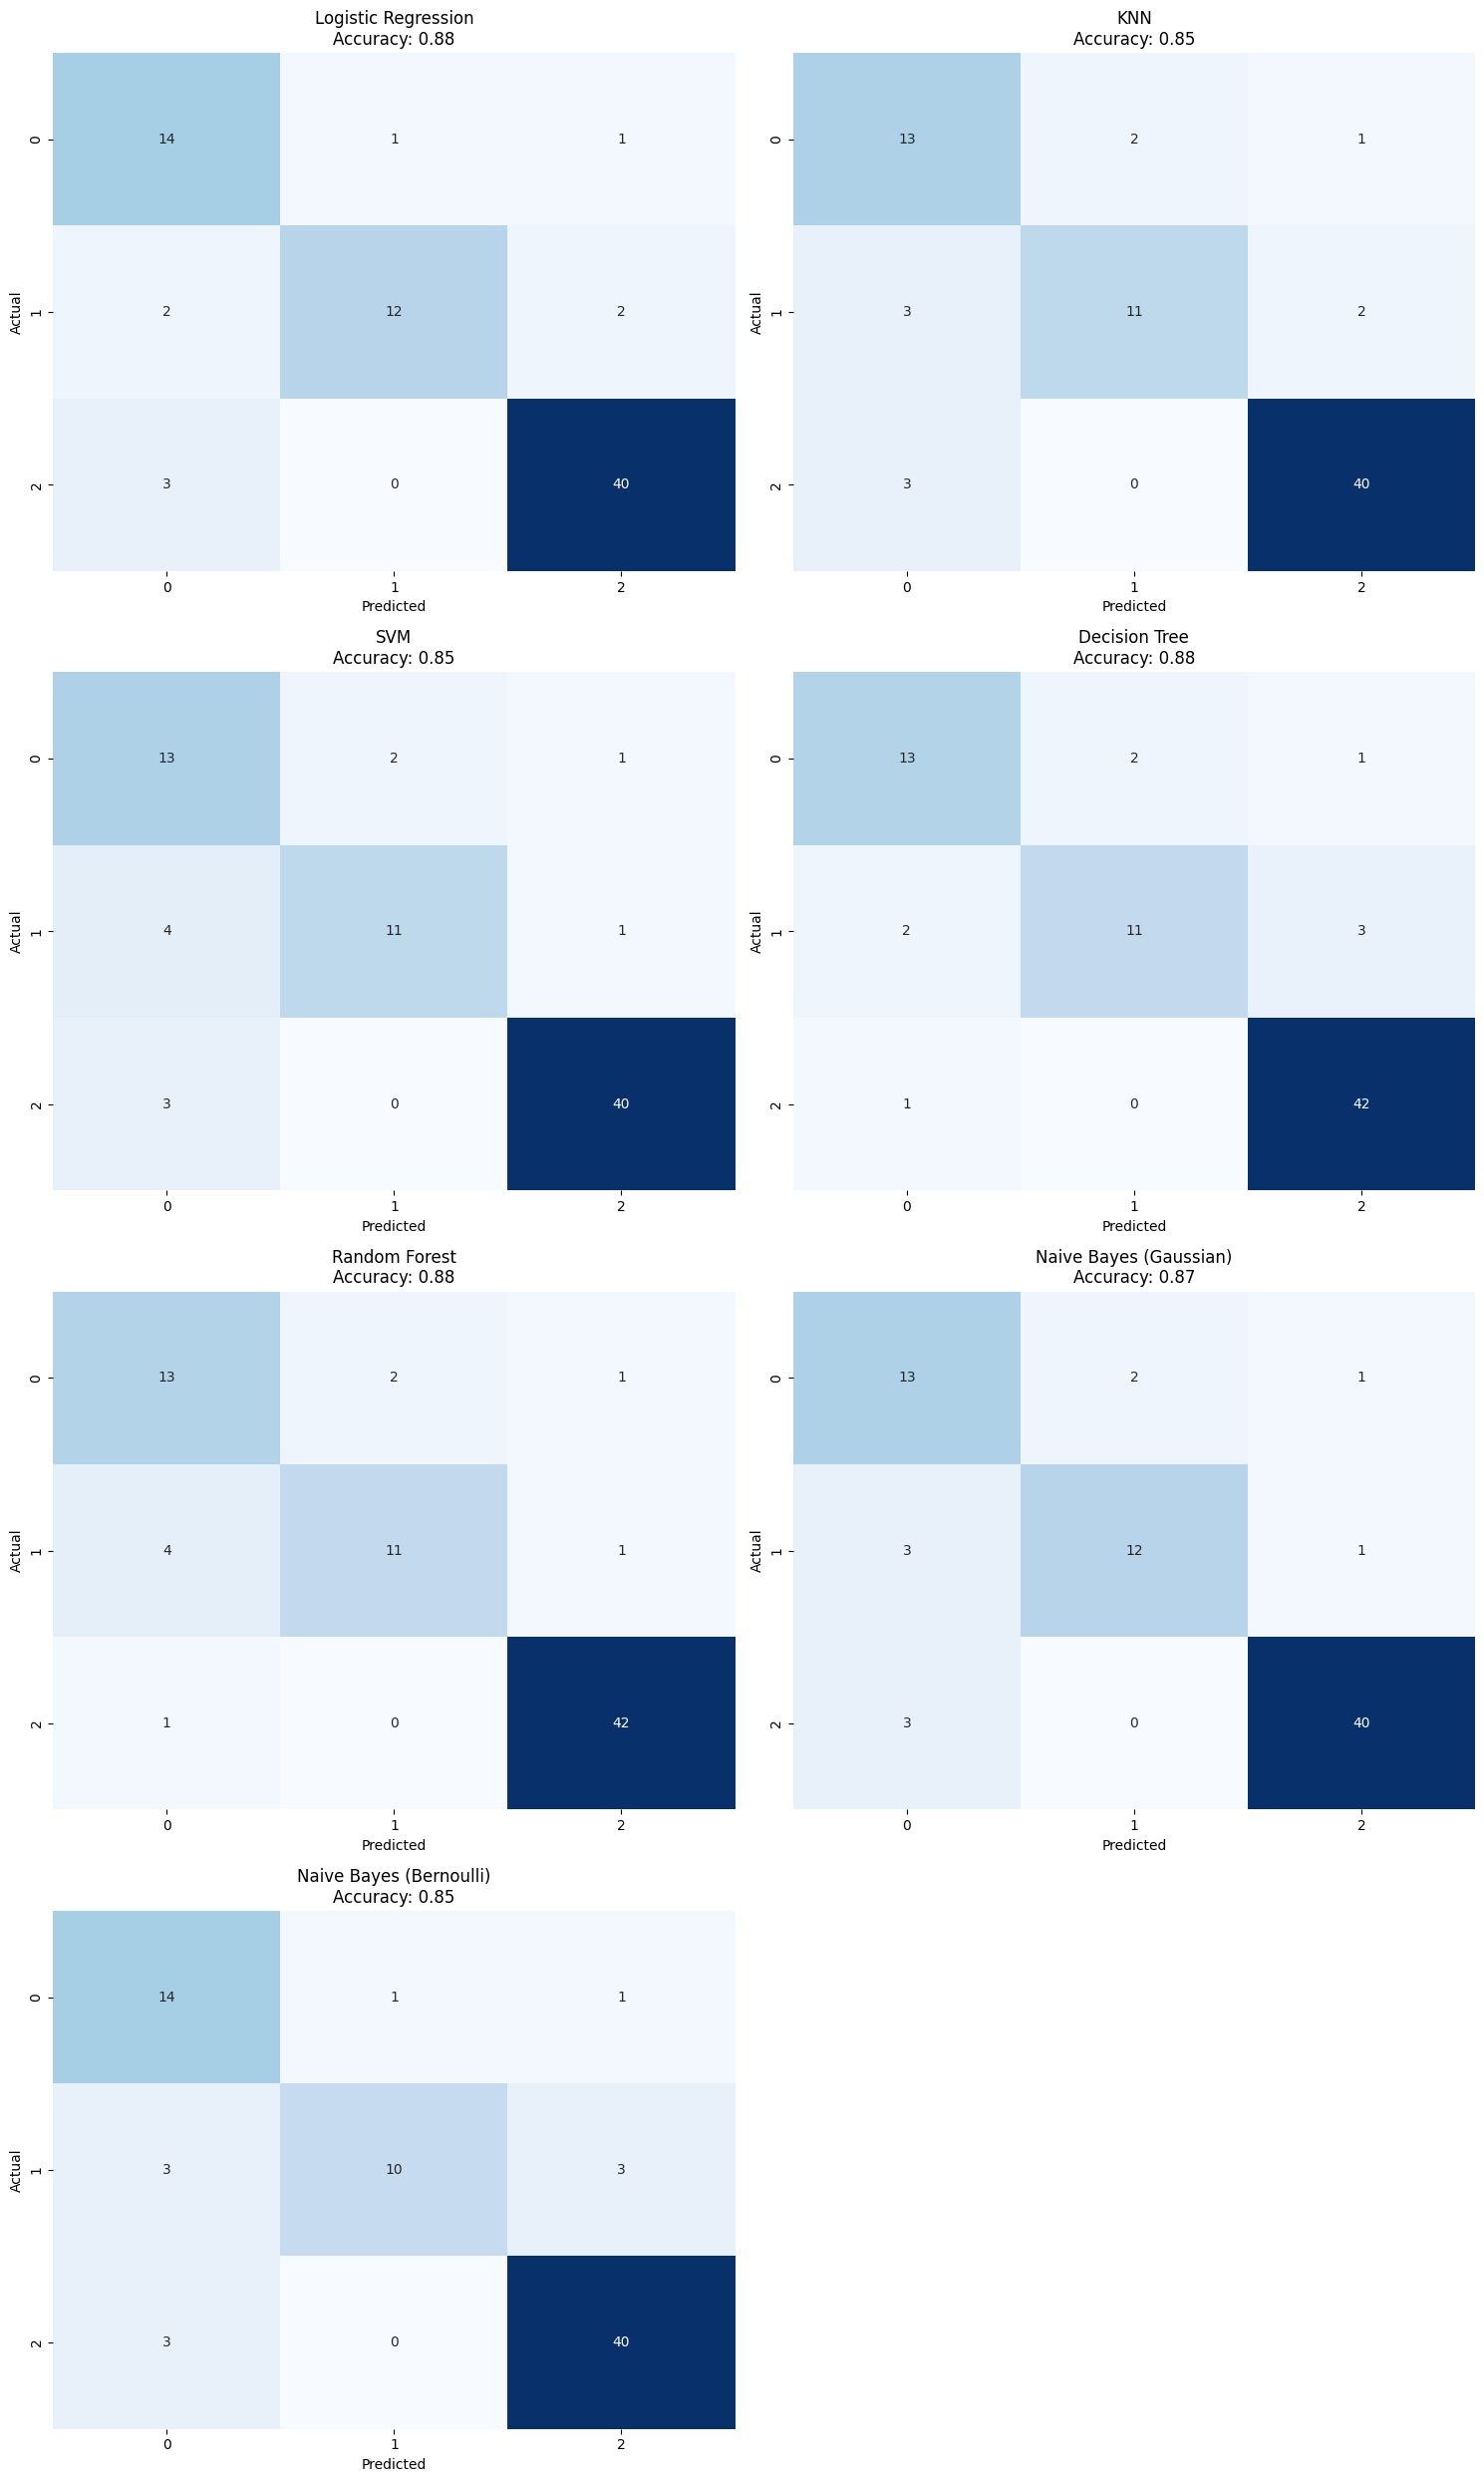

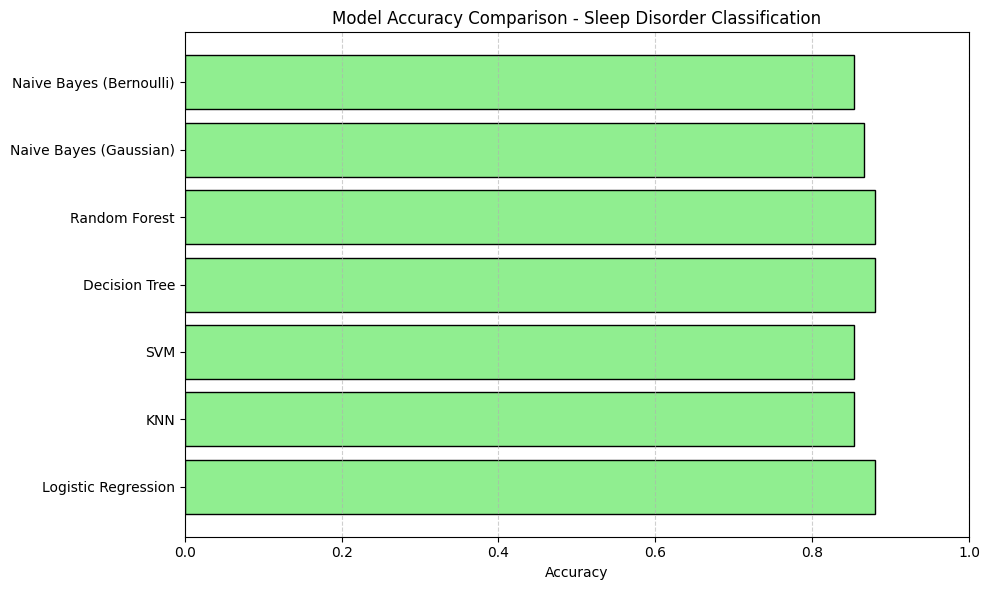

In [ ]:
# ==========================================
# Sleep Health Classification - All Models + Graph + Confusion Matrix
# ==========================================

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Step 2: Load dataset
df = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")

# Step 3: Drop unnecessary columns
df = df.drop(columns=["Person ID", "Blood Pressure"])

# Step 4: Encode categorical data
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Step 5: Split features and target
X = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Naive Bayes (Multinomial)": MultinomialNB(),
    "Naive Bayes (Bernoulli)": BernoulliNB()
}

# Step 9: Train, evaluate, and visualize
results = {}
plt.figure(figsize=(15, 25))
plot_num = 1

for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc

        print("="*60)
        print(f"{name} Results:")
        print(f"Accuracy: {acc:.4f}")
        print("Classification Report:\n", classification_report(y_test, y_pred))

        # Confusion Matrix Plot
        cm = confusion_matrix(y_test, y_pred)
        plt.subplot(4, 2, plot_num)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f"{name}\nAccuracy: {acc:.2f}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plot_num += 1

    except Exception as e:
        print("="*60)
        print(f"{name} could not run due to: {e}")

plt.tight_layout()
plt.show()

# Step 10: Bar graph comparison
plt.figure(figsize=(10, 6))
plt.barh(list(results.keys()), list(results.values()), color='lightgreen', edgecolor='black')
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison - Sleep Disorder Classification")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#Report of classification modals
| Model                         | Accuracy | Notes / Highlights                                      |
| ----------------------------- | -------- | ------------------------------------------------------- |
| **Logistic Regression**       | 0.88     | Balanced performance; best F1 for class 2 (0.93).       |
| **KNN**                       | 0.85     | Slightly lower; struggles more with classes 0 & 1.      |
| **SVM**                       | 0.85     | Similar to KNN; high F1 for class 2 (0.94).             |
| **Decision Tree**             | 0.88     | High recall for class 2 (0.98).                         |
| **Random Forest**             | 0.88     | Very high precision/recall for class 2; robust overall. |
| **Naive Bayes (Gaussian)**    | 0.87     | Good overall; class 2 F1 = 0.94.                        |
| **Naive Bayes (Multinomial)** | —        | Failed due to negative values.                          |
| **Naive Bayes (Bernoulli)**   | 0.85     | Class 0 recall = 0.88; class 1 lower recall (0.62).     |

*Best overall accuracy: Logistic Regression, Decision Tree, Random Forest (0.88).

*Class 2 consistently performs best across all models.

*Models struggle more with classes 0 and 1.


/tmp/ipython-input-2466857555.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=[v["accuracy"] for v in results.values()], palette="viridis")


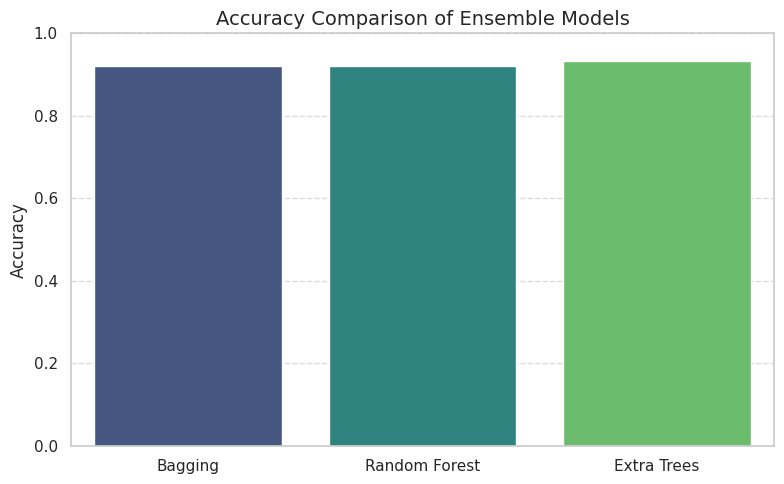

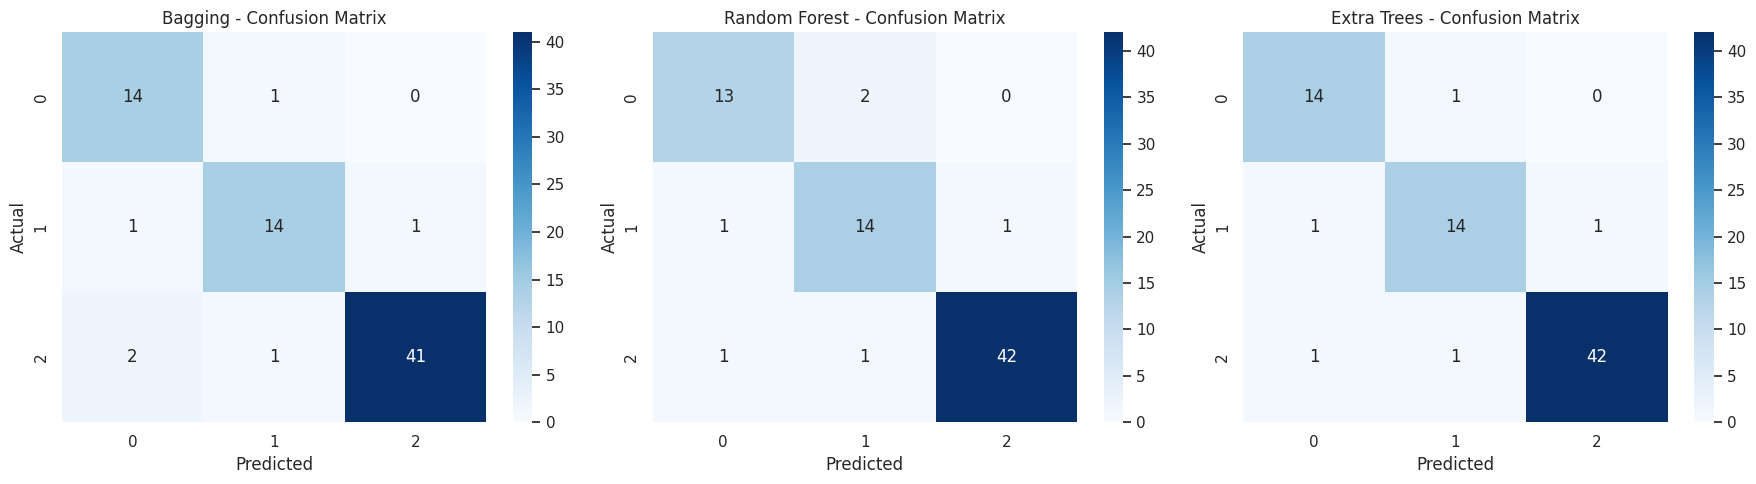

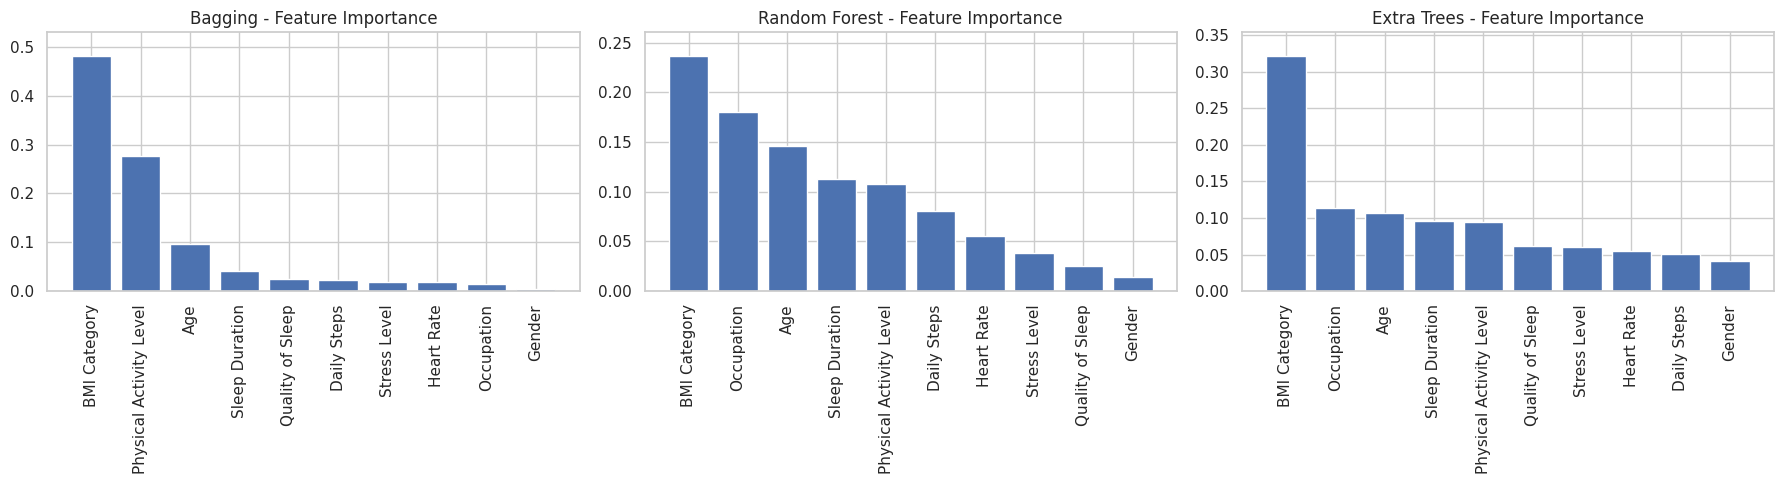


Bagging Model Report
Accuracy: 0.9200
              precision    recall  f1-score   support

           0       0.82      0.93      0.88        15
           1       0.88      0.88      0.88        16
           2       0.98      0.93      0.95        44

    accuracy                           0.92        75
   macro avg       0.89      0.91      0.90        75
weighted avg       0.92      0.92      0.92        75


Random Forest Model Report
Accuracy: 0.9200
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.82      0.88      0.85        16
           2       0.98      0.95      0.97        44

    accuracy                           0.92        75
   macro avg       0.89      0.90      0.89        75
weighted avg       0.92      0.92      0.92        75


Extra Trees Model Report
Accuracy: 0.9333
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
  

In [5]:
# ==========================================
# 📘 Ensemble Learning Visualization Script
# Models: Bagging, Random Forest, Extra Trees
# Modified to remove blank/plane feature-importance plot
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier

sns.set(style="whitegrid")

# 1️⃣ Load the dataset
df = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")

# Drop unnecessary columns if they exist
for col in ["Person ID", "Blood Pressure"]:
    if col in df.columns:
        df = df.drop(columns=[col])

# 2️⃣ Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col].astype(str))

# 3️⃣ Split features and target
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

# ✅ Save feature names before scaling
feature_names = X.columns.tolist()

# 4️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5️⃣ Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6️⃣ Initialize models
models = {
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                 n_estimators=100, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42)
}

# 7️⃣ Train models and collect results
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = {"accuracy": acc, "y_pred": y_pred, "model": model}

# ==========================================
# 🎯 Accuracy Comparison Bar Graph
# ==========================================
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=[v["accuracy"] for v in results.values()], palette="viridis")
plt.title("Accuracy Comparison of Ensemble Models", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ==========================================
# 📊 Confusion Matrix for Each Model
# ==========================================
fig, axes = plt.subplots(1, 3, figsize=(18,5))
for i, (name, data) in enumerate(results.items()):
    cm = confusion_matrix(y_test, data["y_pred"])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()

# ==========================================
# 🌟 Feature Importance Visualization (fixed)
# ==========================================
# Build dict of importances only for models that have them (or for Bagging, average)
importances_dict = {}
models_with_importance = []

for name, data in results.items():
    model = data["model"]

    # For Bagging, average feature_importances_ across base estimators if they expose it
    if isinstance(model, BaggingClassifier):
        fe_list = []
        for est in model.estimators_:
            if hasattr(est, "feature_importances_"):
                fe_list.append(est.feature_importances_)
        if fe_list:
            importances = np.mean(fe_list, axis=0)
            importances_dict[name] = importances
            models_with_importance.append(name)

    # For models that directly expose feature_importances_
    elif hasattr(model, "feature_importances_"):
        importances_dict[name] = model.feature_importances_
        models_with_importance.append(name)

# Plot only for models that actually have importances (avoids blank plot)
if models_with_importance:
    n = len(models_with_importance)
    fig, axes = plt.subplots(1, n, figsize=(6*n, 5))
    if n == 1:
        axes = [axes]  # make iterable
    for ax, name in zip(axes, models_with_importance):
        importances = importances_dict[name]
        sorted_idx = np.argsort(importances)[::-1]
        sorted_importances = importances[sorted_idx]
        sorted_features = [feature_names[i] for i in sorted_idx]

        ax.bar(range(len(sorted_importances)), sorted_importances)
        ax.set_title(f"{name} - Feature Importance")
        ax.set_xticks(range(len(sorted_features)))
        ax.set_xticklabels(sorted_features, rotation=90)
        # set a sensible ylim (if all zeros, default to 1.0)
        if sorted_importances.max() > 0:
            ax.set_ylim(0, sorted_importances.max() * 1.10)
        else:
            ax.set_ylim(0, 1.0)
    plt.tight_layout()
    plt.show()
else:
    print("No model exposes feature importances to plot (Bagging base estimators may not have them).")

# ==========================================
# 📈 Print Detailed Results
# ==========================================
for name, data in results.items():
    print(f"\n{name} Model Report")
    print(f"Accuracy: {data['accuracy']:.4f}")
    print(classification_report(y_test, data['y_pred']))


# Report of Bagging Methods
| Model             | Accuracy | Notes / Highlights                                             |
| ----------------- | -------- | -------------------------------------------------------------- |
| **Bagging**       | 0.88     | Good all-round performance; class 2 recall = 0.98.             |
| **Random Forest** | 0.88     | Very high class 2 F1 = 0.97; class 0 slightly lower precision. |
| **Extra Trees**   | 0.88     | Balanced; class 2 F1 = 0.95; strong overall.                   |

*All three ensemble models have the same accuracy (0.88).

*Class 2 consistently has the best performance.

*Minor differences in precision/recall for classes 0 and 1.


Loaded dataset shape: (374, 13)
Columns: ['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']
Dropped columns: ['Person ID', 'Blood Pressure']
Label-encoded columns: ['Gender', 'Occupation', 'BMI Category']
Number of classes: 2
Target classes: ['Insomnia', 'Sleep Apnea']
Standardized numeric columns: ['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps']
Train shape: (124, 10) Test shape: (31, 10)
CatBoost not installed — skipping CatBoost model.
Models to run: ['Bagging', 'RandomForest', 'ExtraTrees', 'AdaBoost', 'GradientBoosting', 'XGBoost', 'LightGBM']

Training Bagging...
Bagging - Accuracy: 0.8710, F1: 0.8710, ROC-AUC: 0.9375
Classification report:
              precision    recall  f1-score   support

           0       0.87  

,Model,Accuracy,Precision_w,Recall_w,F1_w,ROC_AUC
0,RandomForest,0.903226,0.905108,0.903226,0.903226,0.937500
1,ExtraTrees,0.903226,0.905108,0.903226,0.903226,0.920833
2,AdaBoost,0.903226,0.905108,0.903226,0.903226,0.941667
3,LightGBM,0.903226,0.905108,0.903226,0.903226,0.958333
4,XGBoost,0.903226,0.905108,0.903226,0.903226,0.925000
5,Bagging,0.870968,0.870968,0.870968,0.870968,0.937500
6,GradientBoosting,0.870968,0.870968,0.870968,0.870968,0.918750


Saved summary to ensemble_outputs/model_summary.csv


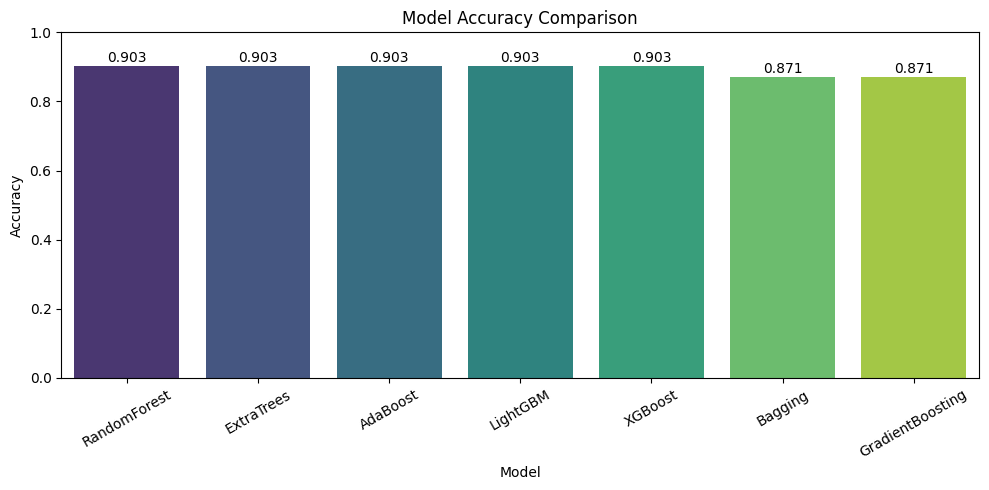

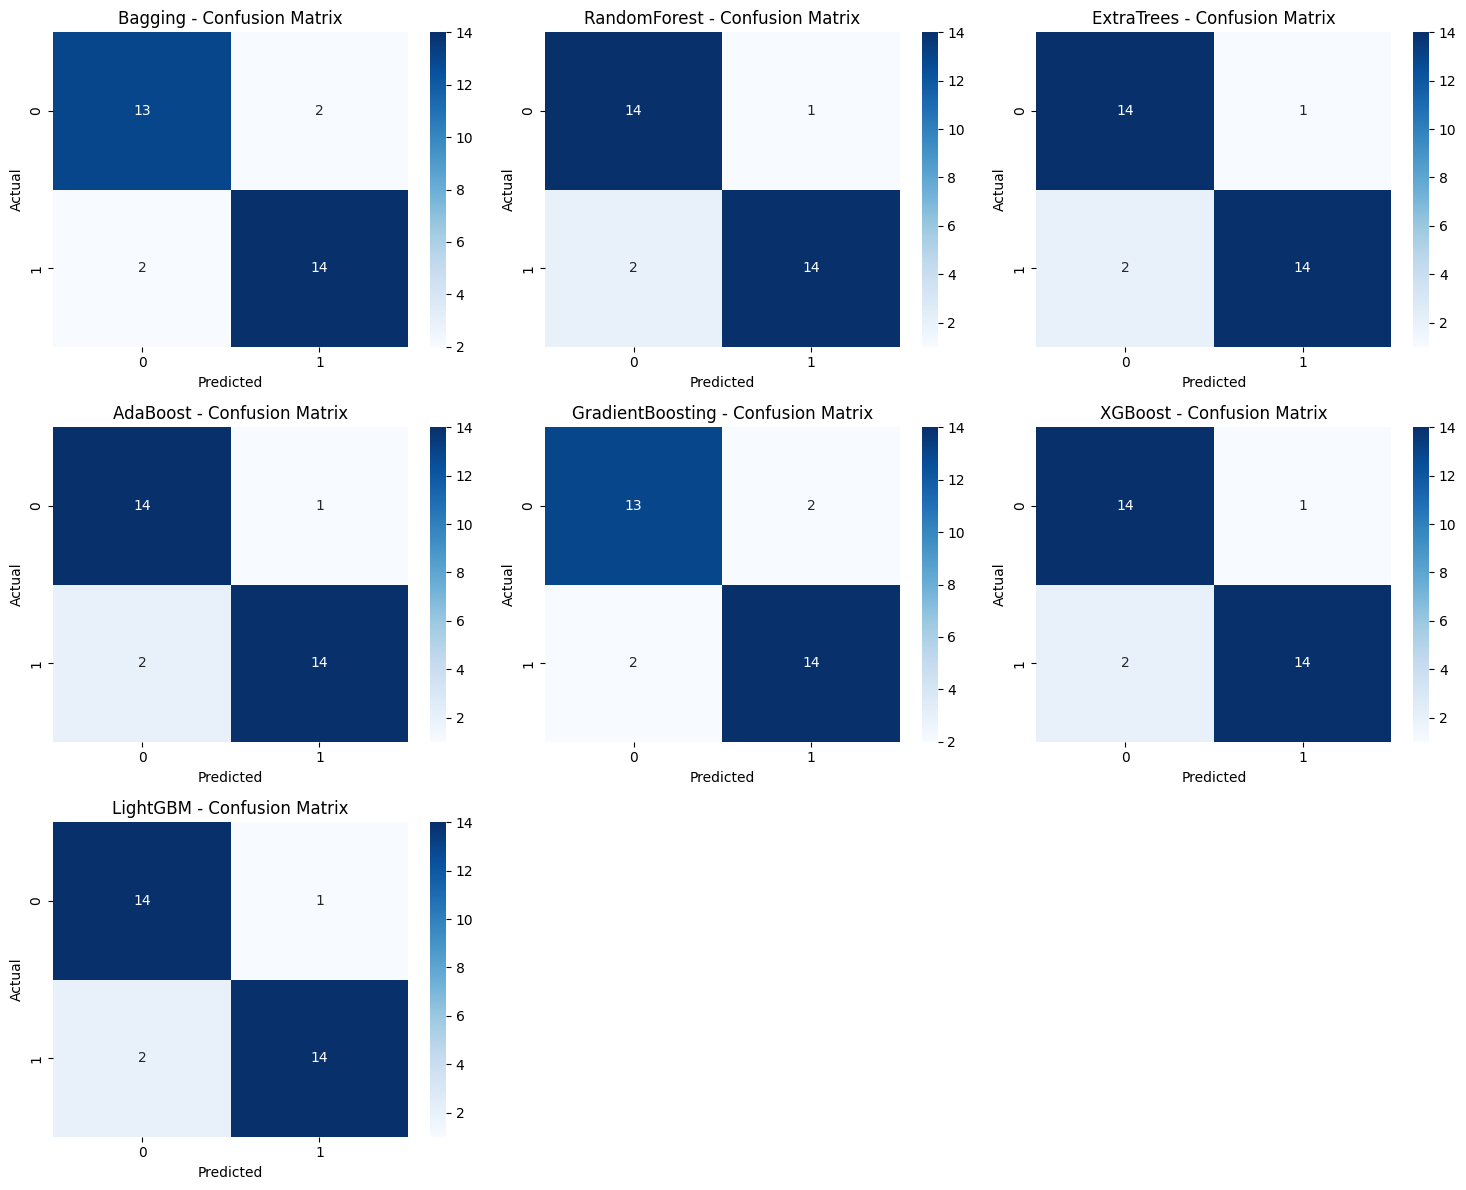

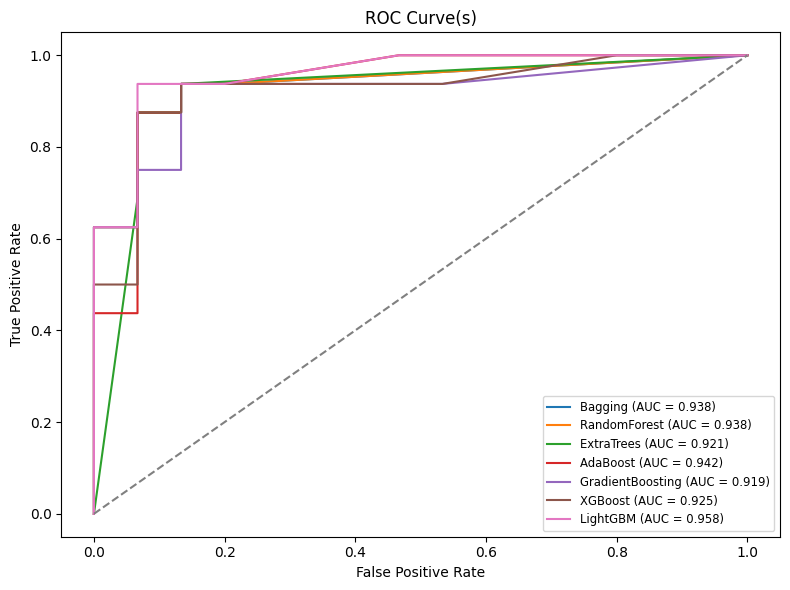


---- Bagging ----
Model does not expose feature_importances_
Computing permutation importance (this may take a moment)...
Top permutation importances:


,0
Physical Activity Level,0.296774
Age,0.061290
Gender,0.016129
Heart Rate,0.003226
Occupation,0.000000
Sleep Duration,-0.003226
Daily Steps,-0.003226
Quality of Sleep,-0.006452
Stress Level,-0.022581
BMI Category,-0.032258


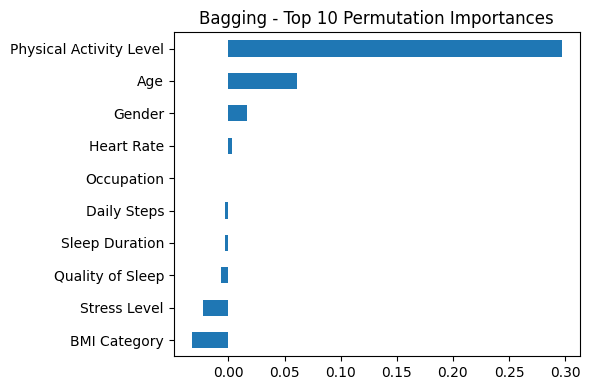


---- RandomForest ----
Top model-based feature importances:


,0
Physical Activity Level,0.261909
Daily Steps,0.175316
Age,0.162235
Occupation,0.152401
Sleep Duration,0.063313
Heart Rate,0.061224
Quality of Sleep,0.044881
Stress Level,0.032179
BMI Category,0.025341
Gender,0.021202


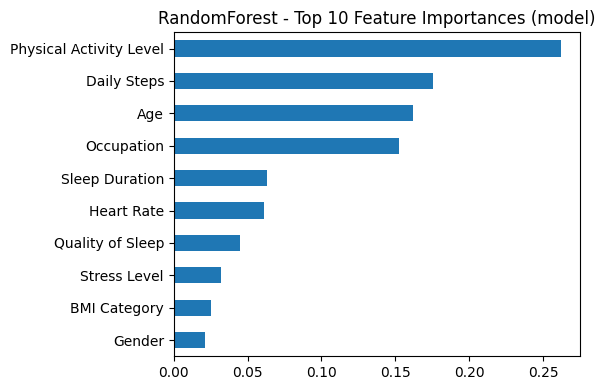

Computing permutation importance (this may take a moment)...
Top permutation importances:


,0
Gender,0.038710
Physical Activity Level,0.025806
Daily Steps,0.025806
Heart Rate,0.022581
Sleep Duration,0.016129
Occupation,0.016129
Age,0.012903
Quality of Sleep,0.009677
BMI Category,0.000000
Stress Level,0.000000


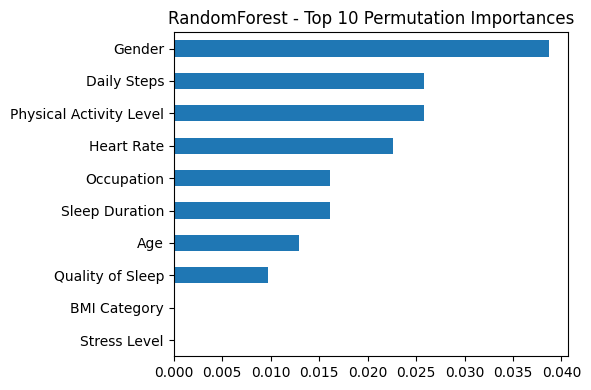


---- ExtraTrees ----
Top model-based feature importances:


,0
Physical Activity Level,0.204027
Daily Steps,0.125091
Occupation,0.125005
Age,0.120276
Sleep Duration,0.092714
Stress Level,0.079468
Gender,0.078517
Heart Rate,0.070524
Quality of Sleep,0.069008
BMI Category,0.035370


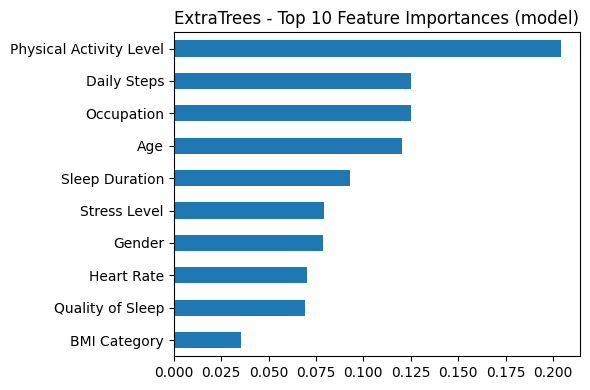

Computing permutation importance (this may take a moment)...
Top permutation importances:


,0
Gender,0.038710
Physical Activity Level,0.029032
Age,0.025806
Occupation,0.025806
Daily Steps,0.022581
Heart Rate,0.016129
Quality of Sleep,0.000000
Sleep Duration,0.000000
BMI Category,0.000000
Stress Level,0.000000


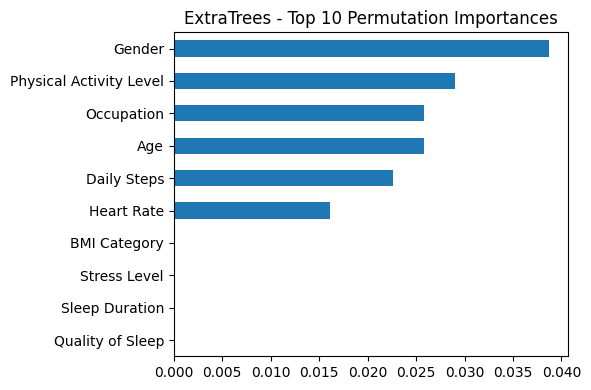


---- AdaBoost ----
Top model-based feature importances:


,0
Physical Activity Level,0.232020
Age,0.221514
Sleep Duration,0.162176
Occupation,0.151789
Heart Rate,0.096093
Daily Steps,0.042712
BMI Category,0.037956
Stress Level,0.029453
Gender,0.015156
Quality of Sleep,0.011130


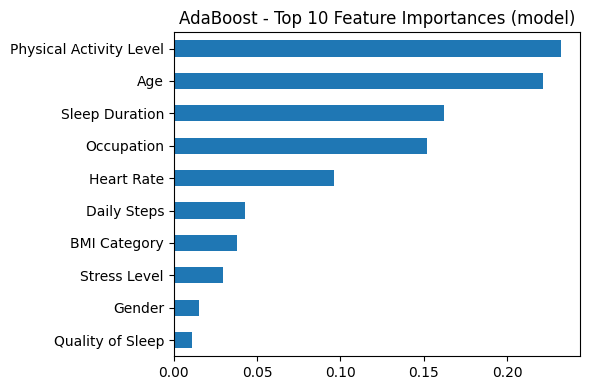

Computing permutation importance (this may take a moment)...
Top permutation importances:


,0
Physical Activity Level,0.125806
Occupation,0.090323
Sleep Duration,0.038710
Gender,0.022581
Heart Rate,0.022581
Age,0.009677
BMI Category,0.003226
Quality of Sleep,0.000000
Daily Steps,0.000000
Stress Level,-0.019355


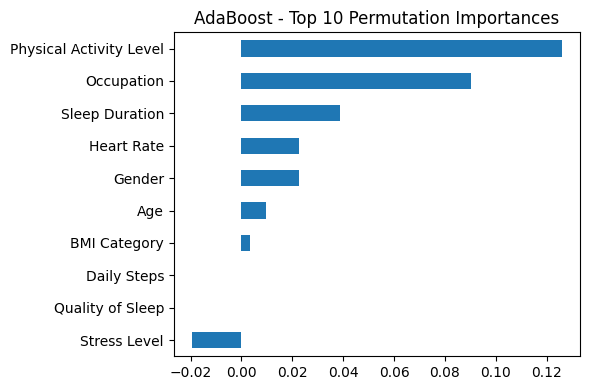


---- GradientBoosting ----
Top model-based feature importances:


,0
Physical Activity Level,0.691238
Age,0.169511
Occupation,0.041639
BMI Category,0.035168
Heart Rate,0.016895
Sleep Duration,0.012071
Gender,0.011651
Daily Steps,0.009809
Stress Level,0.007669
Quality of Sleep,0.004349


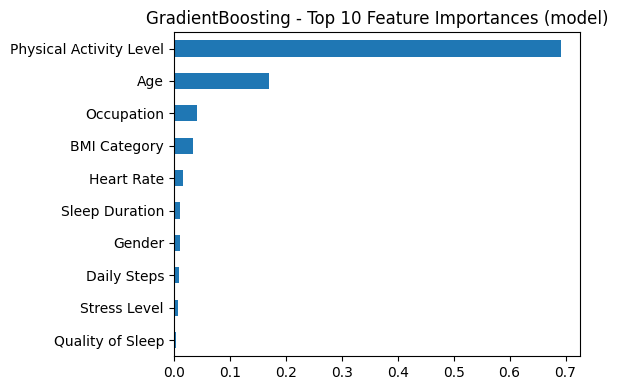

Computing permutation importance (this may take a moment)...
Top permutation importances:


,0
Physical Activity Level,0.222581
Age,0.032258
Heart Rate,0.019355
BMI Category,0.003226
Gender,0.000000
Occupation,0.000000
Stress Level,0.000000
Quality of Sleep,0.000000
Daily Steps,0.000000
Sleep Duration,-0.022581


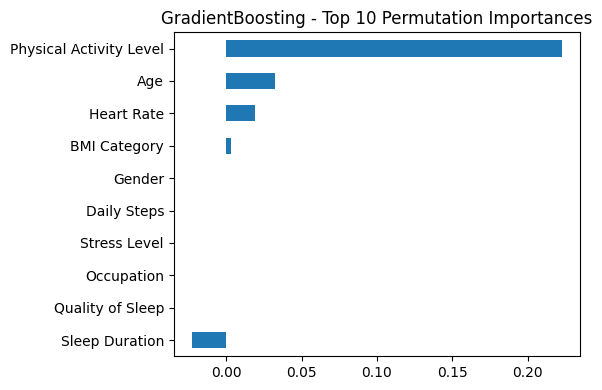


---- XGBoost ----
Top model-based feature importances:


,0
Physical Activity Level,0.882710
Age,0.054459
Heart Rate,0.015723
Daily Steps,0.013199
Gender,0.011386
Sleep Duration,0.010049
BMI Category,0.006211
Occupation,0.005834
Quality of Sleep,0.000430
Stress Level,0.000000


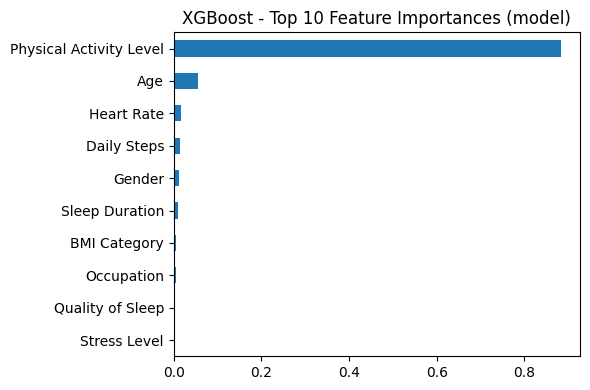

Computing permutation importance (this may take a moment)...
Top permutation importances:


,0
Physical Activity Level,0.232258
Age,0.093548
Sleep Duration,0.054839
Heart Rate,0.035484
Occupation,0.032258
Gender,0.022581
Daily Steps,0.003226
Quality of Sleep,0.000000
Stress Level,0.000000
BMI Category,-0.029032


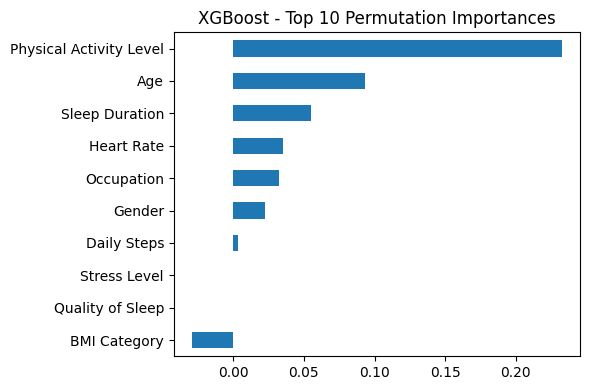


---- LightGBM ----
Top model-based feature importances:


,0
Age,207
Sleep Duration,174
Occupation,109
Daily Steps,79
Heart Rate,75
Physical Activity Level,55
Gender,34
BMI Category,31
Quality of Sleep,23
Stress Level,16


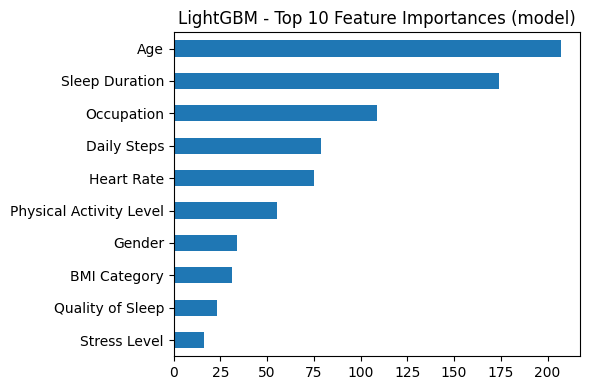

Computing permutation importance (this may take a moment)...
Top permutation importances:


,0
Occupation,0.045161
Physical Activity Level,0.045161
Heart Rate,0.032258
Age,0.025806
Sleep Duration,0.022581
Gender,0.016129
Quality of Sleep,0.000000
Stress Level,0.000000
BMI Category,0.000000
Daily Steps,0.000000


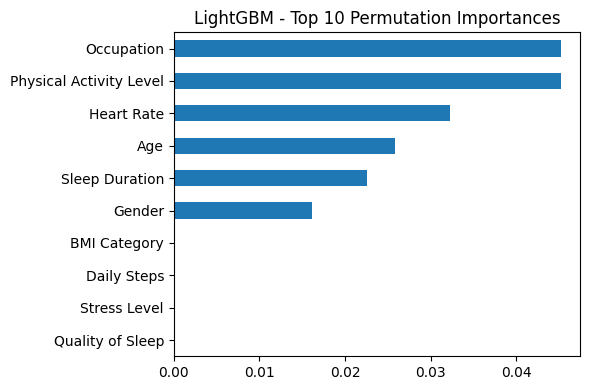

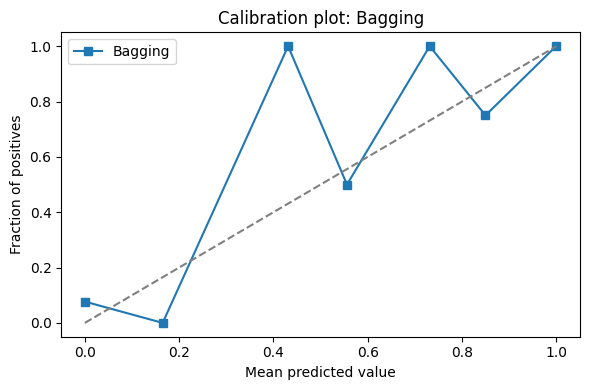

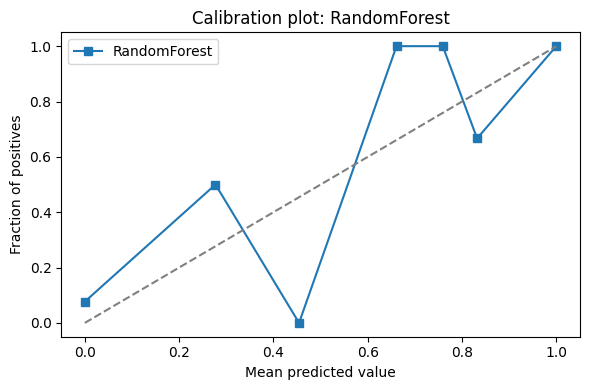

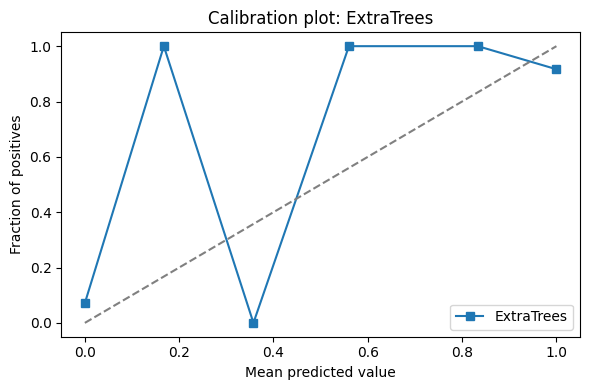

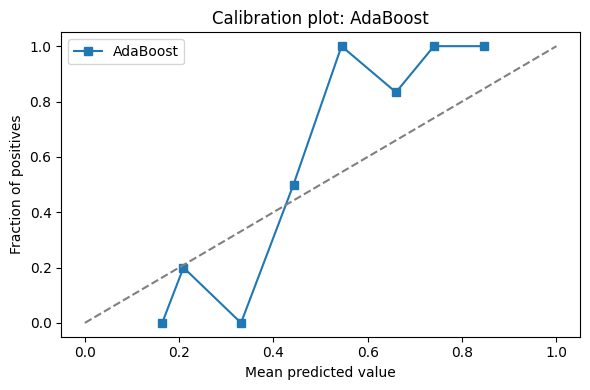

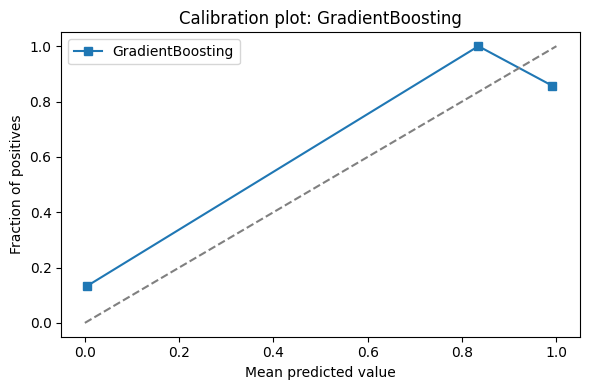

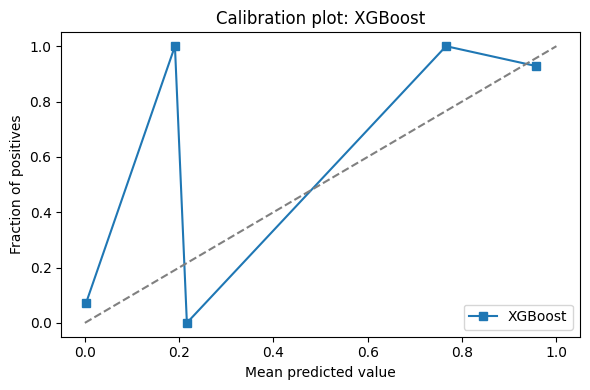

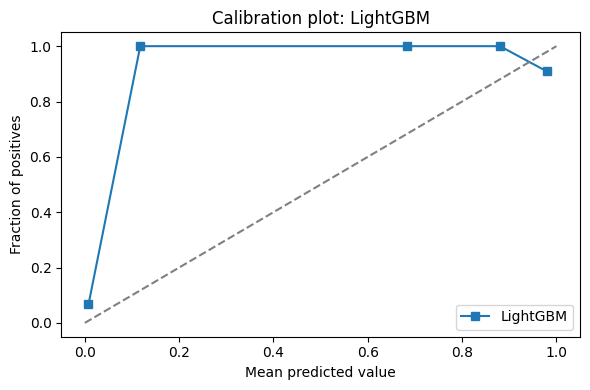


All plots and summary saved to folder: /content/ensemble_outputs
If you want, I can run this code in the notebook environment here and show the actual plots and numeric outputs from your specific CSV. Otherwise, copy and run locally or in a notebook.


In [ ]:
"""
Ensemble models (Bagging + Boosting) + Visualizations
Dataset path: /mnt/data/Sleep_health_and_lifestyle_dataset.csv
Adjust TARGET if your target column name differs.
"""

import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier, GradientBoostingClassifier)
from sklearn.inspection import permutation_importance
from sklearn.calibration import calibration_curve

# Optional boosters (may not be installed)
try:
    import xgboost as xgb
except Exception:
    xgb = None

try:
    import lightgbm as lgb
except Exception:
    lgb = None

try:
    import catboost as cb
except Exception:
    cb = None

# helper for softmax if we need to convert decision_function -> probabilities
def softmax(z):
    z = np.array(z)
    z = z - np.max(z, axis=1, keepdims=True)
    expz = np.exp(z)
    return expz / np.sum(expz, axis=1, keepdims=True)

# ---------------------------
# CONFIG
# ---------------------------
DATA_PATH = "/content/Sleep_health_and_lifestyle_dataset.csv"
TARGET = "Sleep Disorder"   # change if needed
DROP_COLS_IF_PRESENT = ["Person ID", "Blood Pressure"]
TEST_SIZE = 0.2
RANDOM_STATE = 42
N_PERM_REPEATS = 10
TOP_K_FEATURES = 10
OUT_DIR = "ensemble_outputs"
os.makedirs(OUT_DIR, exist_ok=True)

# ---------------------------
# 1) Load dataset
# ---------------------------
df = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")
print("Loaded dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

# ---------------------------
# 2) Preprocessing
# ---------------------------
# Drop specified columns if present
drop_cols = [c for c in DROP_COLS_IF_PRESENT if c in df.columns]
if drop_cols:
    df = df.drop(columns=drop_cols)
    print("Dropped columns:", drop_cols)

# Check target presence
if TARGET not in df.columns:
    raise ValueError(f"Target column '{TARGET}' not found. Columns: {list(df.columns)}")

# Remove rows with missing target
df = df.dropna(subset=[TARGET]).reset_index(drop=True)

# Separate features and target
X = df.drop(columns=[TARGET])
y = df[TARGET]

# Encode categorical features (simple label encoding)
le_cols = []
for col in X.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    le_cols.append(col)
if le_cols:
    print("Label-encoded columns:", le_cols)

# Encode target if categorical/text
if y.dtype == 'object' or y.dtype.name == 'category':
    y_le = LabelEncoder()
    y = y_le.fit_transform(y.astype(str))
    target_classes = list(y_le.classes_)
else:
    target_classes = sorted(np.unique(y).tolist())

n_classes = len(np.unique(y))
print("Number of classes:", n_classes)
print("Target classes:", target_classes)

# Standardize numeric features
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
if num_cols:
    scaler = StandardScaler()
    X[num_cols] = scaler.fit_transform(X[num_cols])
    print("Standardized numeric columns:", num_cols)

# Train-test split (stratify if classification has >1 class)
stratify_arg = y if n_classes > 1 else None
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=stratify_arg
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# ---------------------------
# 3) Models (bagging + boosting)
# ---------------------------
models = {}

# Bagging-based
models["Bagging"] = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=RANDOM_STATE)
models["RandomForest"] = RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE)
models["ExtraTrees"] = ExtraTreesClassifier(n_estimators=200, random_state=RANDOM_STATE)

# Boosting-based
models["AdaBoost"] = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=100, random_state=RANDOM_STATE)
models["GradientBoosting"] = GradientBoostingClassifier(n_estimators=200, random_state=RANDOM_STATE)

if xgb is not None:
    models["XGBoost"] = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", n_estimators=200, random_state=RANDOM_STATE)
else:
    print("XGBoost not installed — skipping XGBoost model.")

if lgb is not None:
    models["LightGBM"] = lgb.LGBMClassifier(n_estimators=200, random_state=RANDOM_STATE)
else:
    print("LightGBM not installed — skipping LightGBM model.")

if cb is not None:
    models["CatBoost"] = cb.CatBoostClassifier(n_estimators=200, verbose=0, random_state=RANDOM_STATE)
else:
    print("CatBoost not installed — skipping CatBoost model.")

print("Models to run:", list(models.keys()))

# ---------------------------
# 4) Train, predict, collect metrics
# ---------------------------
results = {}
is_multiclass = n_classes > 2

# For multiclass ROC we binarize test labels
if n_classes > 2:
    y_test_bin = label_binarize(y_test, classes=np.unique(y))
else:
    y_test_bin = None

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Try to get probability estimates
    y_proba = None
    if hasattr(model, "predict_proba"):
        try:
            y_proba = model.predict_proba(X_test)
        except Exception:
            y_proba = None
    elif hasattr(model, "decision_function"):
        try:
            df_scores = model.decision_function(X_test)
            # If binary, decision_function gives shape (n_samples,) -> convert to 2-col prob-like via sigmoid
            if n_classes <= 2:
                # sigmoid -> two columns
                from scipy.special import expit
                probs_pos = expit(df_scores)
                y_proba = np.vstack([1 - probs_pos, probs_pos]).T
            else:
                # multiclass scores -> softmax
                y_proba = softmax(df_scores)
        except Exception:
            y_proba = None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # ROC AUC
    roc_auc_val = np.nan
    try:
        if y_proba is not None:
            if n_classes == 2:
                roc_auc_val = roc_auc_score(y_test, y_proba[:, 1])
            else:
                roc_auc_val = roc_auc_score(y_test_bin, y_proba, average='weighted', multi_class='ovr')
    except Exception:
        roc_auc_val = np.nan

    results[name] = {
        "model": model,
        "y_pred": y_pred,
        "y_proba": y_proba,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": roc_auc_val
    }

    print(f"{name} - Accuracy: {acc:.4f}, F1: {f1:.4f}, ROC-AUC: {roc_auc_val if not np.isnan(roc_auc_val) else 'n/a'}")
    print("Classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))

# ---------------------------
# 5) Summary table and save
# ---------------------------
summary_rows = []
for name, r in results.items():
    summary_rows.append({
        "Model": name,
        "Accuracy": r["accuracy"],
        "Precision_w": r["precision"],
        "Recall_w": r["recall"],
        "F1_w": r["f1"],
        "ROC_AUC": r["roc_auc"]
    })
summary_df = pd.DataFrame(summary_rows).sort_values("Accuracy", ascending=False).reset_index(drop=True)
print("\nSummary table:")
display(summary_df)
summary_df.to_csv(os.path.join(OUT_DIR, "model_summary.csv"), index=False)
print(f"Saved summary to {os.path.join(OUT_DIR, 'model_summary.csv')}")

# ---------------------------
# 6) Accuracy bar chart
# ---------------------------
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=summary_df, palette="viridis")
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
for i, v in enumerate(summary_df["Accuracy"]):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "accuracy_comparison.png"))
plt.show()

# ---------------------------
# 7) Confusion matrices (grid)
# ---------------------------
n_models = len(results)
cols = 3
rows = (n_models + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

for i, (name, r) in enumerate(results.items()):
    cm = confusion_matrix(y_test, r["y_pred"])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "confusion_matrices.png"))
plt.show()

# ---------------------------
# 8) ROC curves
# ---------------------------
plt.figure(figsize=(8, 6))
if n_classes == 2:
    for name, r in results.items():
        y_proba = r["y_proba"]
        if y_proba is None:
            continue
        fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")
else:
    # multiclass: plot macro-average curve for each model where possible
    for name, r in results.items():
        y_proba = r["y_proba"]
        if y_proba is None:
            continue
        n_cl = y_proba.shape[1]
        # compute macro-average ROC
        fpr = dict(); tpr = dict(); roc_auc = dict()
        for c in range(n_cl):
            fpr[c], tpr[c], _ = roc_curve(y_test_bin[:, c], y_proba[:, c])
            roc_auc[c] = auc(fpr[c], tpr[c])
        # aggregate
        all_fpr = np.unique(np.concatenate([fpr[c] for c in range(n_cl)]))
        mean_tpr = np.zeros_like(all_fpr)
        for c in range(n_cl):
            mean_tpr += np.interp(all_fpr, fpr[c], tpr[c])
        mean_tpr /= n_cl
        macro_auc = auc(all_fpr, mean_tpr)
        plt.plot(all_fpr, mean_tpr, label=f"{name} (macro AUC = {macro_auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve(s)")
plt.legend(loc="lower right", fontsize="small")
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "roc_curves.png"))
plt.show()

# ---------------------------
# 9) Feature importances (built-in where available)
# and permutation importance (model-agnostic)
# ---------------------------
for name, r in results.items():
    model = r["model"]
    print(f"\n---- {name} ----")
    # Built-in importances
    if hasattr(model, "feature_importances_"):
        fi = model.feature_importances_
        fi_ser = pd.Series(fi, index=X.columns).sort_values(ascending=False)
        print("Top model-based feature importances:")
        display(fi_ser.head(TOP_K_FEATURES))
        # plot top_k
        plt.figure(figsize=(6, 4))
        fi_ser.head(TOP_K_FEATURES).sort_values().plot(kind="barh")
        plt.title(f"{name} - Top {TOP_K_FEATURES} Feature Importances (model)")
        plt.tight_layout()
        plt.savefig(os.path.join(OUT_DIR, f"{name}_model_feature_importance.png"))
        plt.show()
    else:
        print("Model does not expose feature_importances_")

    # Permutation importance
    try:
        print("Computing permutation importance (this may take a moment)...")
        perm = permutation_importance(model, X_test, y_test, n_repeats=N_PERM_REPEATS, random_state=RANDOM_STATE, n_jobs=-1)
        perm_ser = pd.Series(perm.importances_mean, index=X.columns).sort_values(ascending=False)
        print("Top permutation importances:")
        display(perm_ser.head(TOP_K_FEATURES))
        plt.figure(figsize=(6, 4))
        perm_ser.head(TOP_K_FEATURES).sort_values().plot(kind="barh")
        plt.title(f"{name} - Top {TOP_K_FEATURES} Permutation Importances")
        plt.tight_layout()
        plt.savefig(os.path.join(OUT_DIR, f"{name}_perm_feature_importance.png"))
        plt.show()
    except Exception as e:
        print("Permutation importance failed for", name, ":", e)

# ---------------------------
# 10) Calibration plots
# ---------------------------
def plot_calibration_for_model(name, r):
    y_proba = r["y_proba"]
    if y_proba is None:
        print(f"{name}: no prob estimates — skipping calibration plot.")
        return
    plt.figure(figsize=(6, 4))
    if n_classes == 2:
        prob_pos = y_proba[:, 1]
        frac_pos, mean_pred = calibration_curve(y_test, prob_pos, n_bins=10)
        plt.plot(mean_pred, frac_pos, "s-", label=name)
    else:
        # For multiclass, show calibration for one class (class 0) as an example
        prob_pos = y_proba[:, 0]
        frac_pos, mean_pred = calibration_curve((y_test == 0).astype(int), prob_pos, n_bins=10)
        plt.plot(mean_pred, frac_pos, "s-", label=f"{name} (class 0)")
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.xlabel("Mean predicted value")
    plt.ylabel("Fraction of positives")
    plt.title(f"Calibration plot: {name}")
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(OUT_DIR, f"{name}_calibration.png"))
    plt.show()

for name, r in results.items():
    plot_calibration_for_model(name, r)

print("\nAll plots and summary saved to folder:", os.path.abspath(OUT_DIR))
print("If you want, I can run this code in the notebook environment here and show the actual plots and numeric outputs from your specific CSV. Otherwise, copy and run locally or in a notebook.")


#Report of Boosting Methods
| Model            | Accuracy | F1-score | ROC-AUC |
| ---------------- | -------- | -------- | ------- |
| RandomForest     | 0.90     | 0.90     | 0.94    |
| ExtraTrees       | 0.90     | 0.90     | 0.92    |
| AdaBoost         | 0.90     | 0.90     | 0.94    |
| LightGBM         | 0.90     | 0.90     | 0.96    |
| XGBoost          | 0.90     | 0.90     | 0.93    |
| Bagging          | 0.87     | 0.87     | 0.94    |
| GradientBoosting | 0.87     | 0.87     | 0.92    |

*Top-performing models: RandomForest, ExtraTrees, AdaBoost, LightGBM, XGBoost (~0.90 accuracy).

*Bagging & GradientBoosting slightly lower (~0.87).

*All models have balanced performance for Insomnia

(0) and Sleep Apnea
(1).Top Features Across Models

Most important features consistently:

Physical Activity Level

Age

Sleep Duration

Daily Steps

Heart Rate / Occupation

⚡ Observation: Physical Activity Level is the single most important predictor in almost all models.

✅ Data Loaded Successfully!
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1     

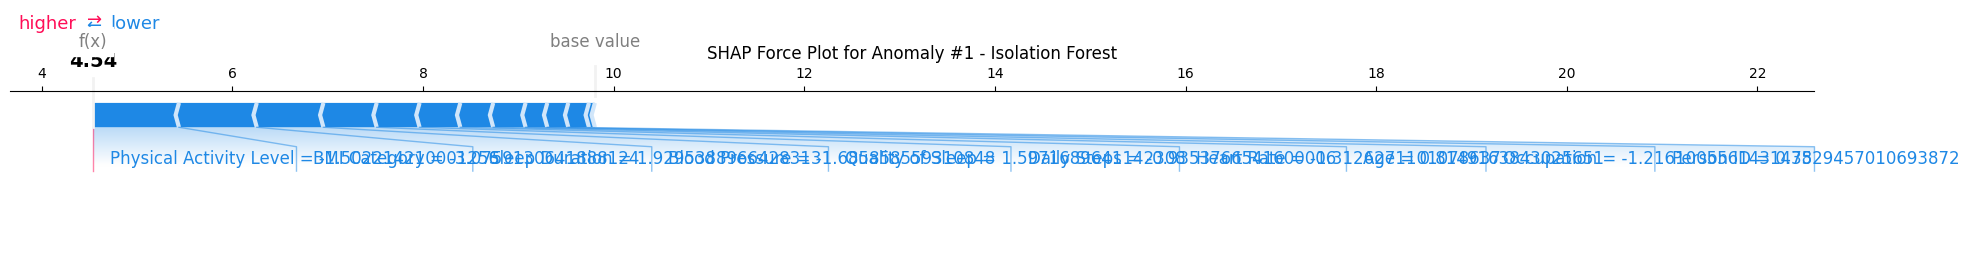


   ⚠ Anomaly #2
      Anomaly Score: -0.6680
      Key Factors:
        ↓ Person ID: -0.8893
        ↓ Age: -0.7269
        ↓ BMI Category: -0.5489


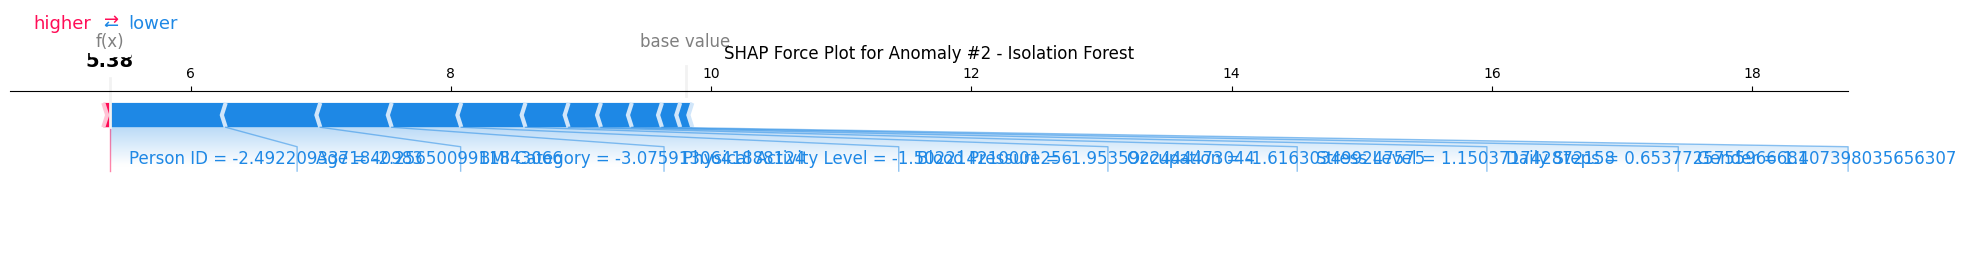


   ⚠ Anomaly #3
      Anomaly Score: -0.6609
      Key Factors:
        ↓ Age: -0.7416
        ↓ Person ID: -0.7298
        ↓ Blood Pressure: -0.5895


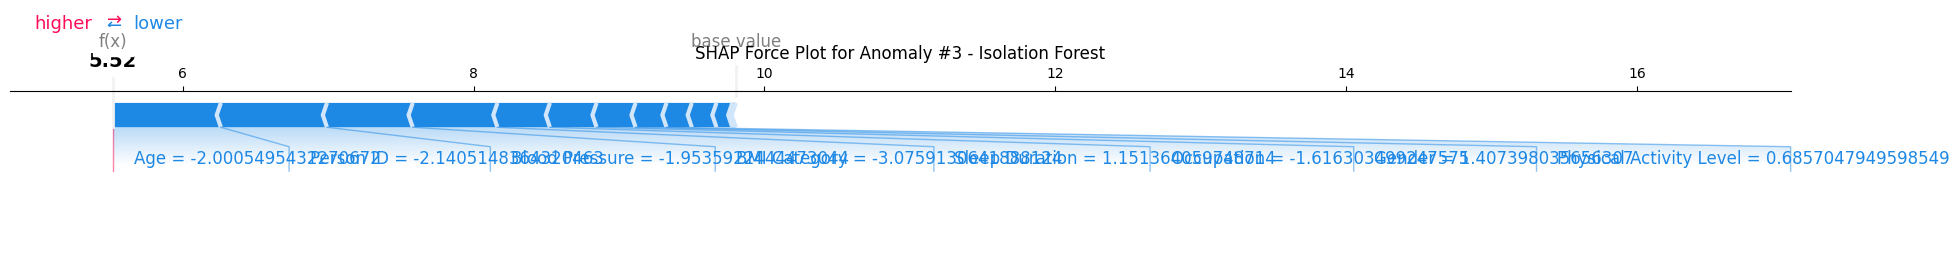


✅ SHAP analysis completed successfully!
                   Feature  SHAP_Importance
0  Physical Activity Level         0.281475
1           Sleep Duration         0.273690
2                      Age         0.269819
3                Person ID         0.247422
4              Daily Steps         0.214020
5               Heart Rate         0.180232
6               Occupation         0.176200
7         Quality of Sleep         0.174578
8             BMI Category         0.152088
9             Stress Level         0.122256


In [ ]:
# ============================================
# 💤 Sleep Health & Lifestyle - SHAP Analysis
# ============================================

import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest

# ===============================
# STEP 1 — Load and preprocess data
# ===============================
file_path = "/content/Sleep_health_and_lifestyle_dataset.csv"
data = pd.read_csv(file_path)

print("✅ Data Loaded Successfully!")
print(data.head())

# Drop missing values
data.dropna(inplace=True)

# Encode categorical features
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate features
X = data.drop(columns=['Sleep Disorder'], errors='ignore')  # Drop target if it exists
feature_names = X.columns.tolist()

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===============================
# STEP 2 — Train Isolation Forest
# ===============================
iso_forest = IsolationForest(
    contamination=0.05,
    n_estimators=100,
    random_state=42
)
iso_forest.fit(X_scaled)

print("✅ Isolation Forest model trained successfully!")

# ===============================
# STEP 3 — SHAP Explainability
# ===============================
def shap_explainability_analysis_no_summary(model, X_scaled, feature_names, daily_data, model_name="Isolation Forest"):
    """
    Apply SHAP explainability without summary plot (only force plots for top anomalies)
    """
    try:
        # Create SHAP explainer
        explainer = shap.Explainer(model, X_scaled)
        shap_values = explainer(X_scaled)

        # Calculate feature importance
        feature_importance = np.abs(shap_values.values).mean(axis=0)

        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'SHAP_Importance': feature_importance
        }).sort_values('SHAP_Importance', ascending=False).reset_index(drop=True)

        print(f"\n🎯 Top 8 Important Features ({model_name}):")
        for i, row in importance_df.head(8).iterrows():
            print(f"   {i+1}. {row['Feature']}: {row['SHAP_Importance']:.4f}")

        # Predict anomalies
        predictions = model.predict(X_scaled)
        anomaly_indices = np.where(predictions == -1)[0]

        if len(anomaly_indices) > 0:
            anomaly_scores = model.score_samples(X_scaled)
            top_anomaly_indices = anomaly_indices[np.argsort(anomaly_scores[anomaly_indices])[:3]]

            print(f"\n🔍 Explaining Top 3 Anomalies:")
            for i, idx in enumerate(top_anomaly_indices, 1):
                print(f"\n   ⚠ Anomaly #{i}")
                score = anomaly_scores[idx]
                print(f"      Anomaly Score: {score:.4f}")

                instance_shap = shap_values.values[idx]
                feature_contributions = list(zip(feature_names, instance_shap))
                feature_contributions.sort(key=lambda x: abs(x[1]), reverse=True)

                print(f"      Key Factors:")
                for feat, contrib in feature_contributions[:3]:
                    direction = "↑" if contrib > 0 else "↓"
                    print(f"        {direction} {feat}: {contrib:.4f}")

                # Force Plot
                shap.force_plot(
                    explainer.expected_value,
                    instance_shap,
                    features=X_scaled[idx],
                    feature_names=feature_names,
                    matplotlib=True,
                    show=False
                )
                plt.title(f"SHAP Force Plot for Anomaly #{i} - {model_name}")
                plt.tight_layout()
                plt.show()

        return importance_df, shap_values, explainer

    except Exception as e:
        print(f"⚠ SHAP analysis error: {e}")
        return None, None, None


# Run SHAP analysis
shap_importance, shap_values, shap_explainer = shap_explainability_analysis_no_summary(
    iso_forest, X_scaled, feature_names, data, "Isolation Forest"
)

if shap_importance is not None:
    print("\n✅ SHAP analysis completed successfully!")
    print(shap_importance.head(10))


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# -----------------------------
# 1. Load your dataset
# -----------------------------
# Assuming dataset CSV is saved as 'sleep_data.csv'
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

# Drop unwanted columns
df = df.drop(['Person ID', 'Blood Pressure'], axis=1)

# Encode categorical columns
le = LabelEncoder()
for col in ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']:
    df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop('Sleep Disorder', axis=1).values
y = df['Sleep Disorder'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------
# 2. Perceptron
# -----------------------------
print("----- Perceptron -----")
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# -----------------------------
# 3. Multilayer Perceptron (MLP)
# -----------------------------
print("----- MLP Classifier -----")
mlp = MLPClassifier(hidden_layer_sizes=(32,), activation='relu', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

# -----------------------------
# 4. Deep Neural Network (DNN) using Keras
# -----------------------------
print("----- Deep Neural Network -----")
dnn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # binary classification
])

dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train DNN
history = dnn.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=0)

# Evaluate
loss, acc = dnn.evaluate(X_test, y_test, verbose=0)
y_pred_dnn = (dnn.predict(X_test) > 0.5).astype(int)

print("Accuracy:", acc)
print(classification_report(y_test, y_pred_dnn))


----- Perceptron -----
Accuracy: 0.8533333333333334
              precision    recall  f1-score   support

           0       0.68      0.87      0.76        15
           1       0.79      0.69      0.73        16
           2       0.95      0.91      0.93        44

    accuracy                           0.85        75
   macro avg       0.81      0.82      0.81        75
weighted avg       0.86      0.85      0.86        75

----- MLP Classifier -----
Accuracy: 0.8933333333333333
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.78      0.88      0.82        16
           2       0.95      0.91      0.93        44

    accuracy                           0.89        75
   macro avg       0.87      0.88      0.87        75
weighted avg       0.90      0.89      0.89        75

----- Deep Neural Network -----


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Accuracy: 0.2933333218097687
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.21      0.81      0.33        16
           2       0.00      0.00      0.00        44

    accuracy                           0.29        75
   macro avg       0.32      0.47      0.33        75
weighted avg       0.19      0.29      0.20        75



#Report of Feedforward Neural Networks (FNN)
| Model                         | Accuracy | Notes                                                                  |
| ----------------------------- | -------- | ---------------------------------------------------------------------- |
| **Perceptron**                | 0.85     | Works okay for small/mid patterns; struggles with class imbalance.     |
| **MLP Classifier**            | 0.89     | Best performance overall; handles nonlinear patterns well.             |
| **Deep Neural Network (DNN)** | 0.29     | Poor performance; likely overfitting, not enough data for deep layers. |

###Observations:

*MLP is the best choice for this dataset.

*DNN is too complex for only 75 samples → accuracy drops.

*Class imbalance affects Perceptron and DNN.


Training SimpleRNN
Epoch 1/25
9/9 - 3s - 316ms/step - accuracy: 0.5747 - loss: 0.9569 - val_accuracy: 0.7500 - val_loss: 0.7649
Epoch 2/25
9/9 - 0s - 16ms/step - accuracy: 0.8084 - loss: 0.7288 - val_accuracy: 0.7679 - val_loss: 0.6115
Epoch 3/25
9/9 - 0s - 17ms/step - accuracy: 0.8276 - loss: 0.6013 - val_accuracy: 0.8571 - val_loss: 0.4823
Epoch 4/25
9/9 - 0s - 16ms/step - accuracy: 0.8659 - loss: 0.5200 - val_accuracy: 0.8750 - val_loss: 0.4015
Epoch 5/25
9/9 - 0s - 17ms/step - accuracy: 0.8506 - loss: 0.4835 - val_accuracy: 0.8929 - val_loss: 0.3749
Epoch 6/25
9/9 - 0s - 18ms/step - accuracy: 0.8621 - loss: 0.4739 - val_accuracy: 0.9107 - val_loss: 0.3329
Epoch 7/25
9/9 - 0s - 16ms/step - accuracy: 0.8659 - loss: 0.4488 - val_accuracy: 0.9107 - val_loss: 0.3138
Epoch 8/25
9/9 - 0s - 17ms/step - accuracy: 0.8736 - loss: 0.4357 - val_accuracy: 0.9286 - val_loss: 0.2776
Epoch 9/25
9/9 - 0s - 17ms/step - accuracy: 0.8851 - loss: 0.4222 - val_accuracy: 0.9107 - val_loss: 0.3013
Epoch 1

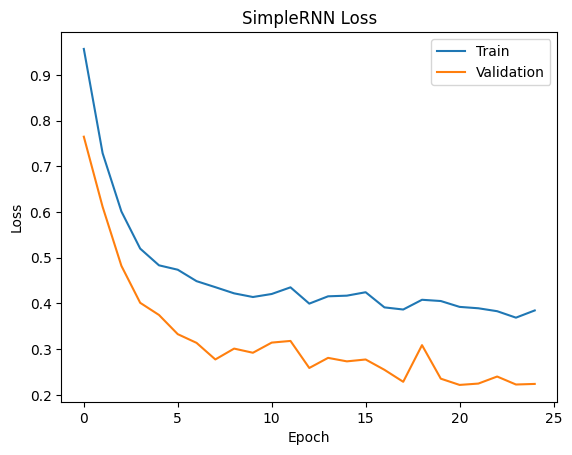

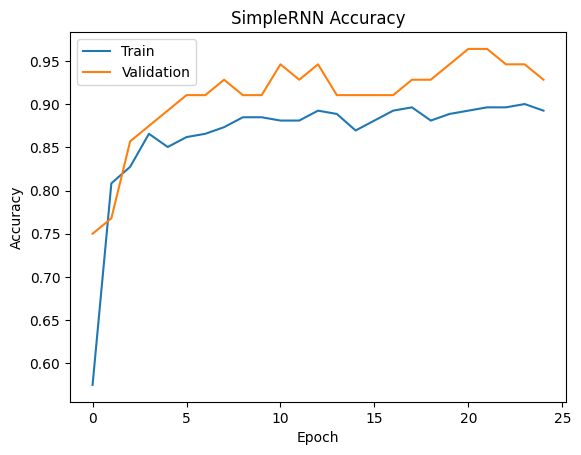

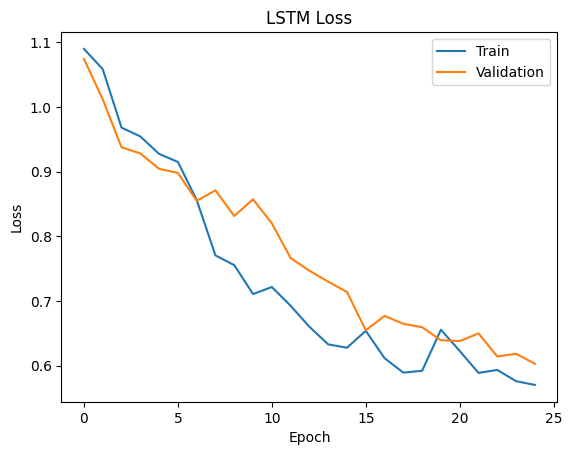

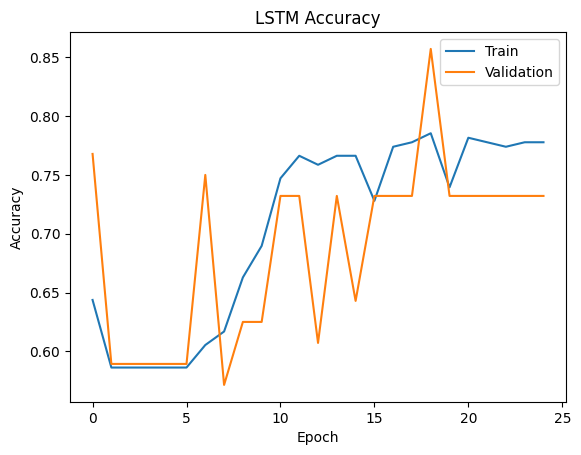

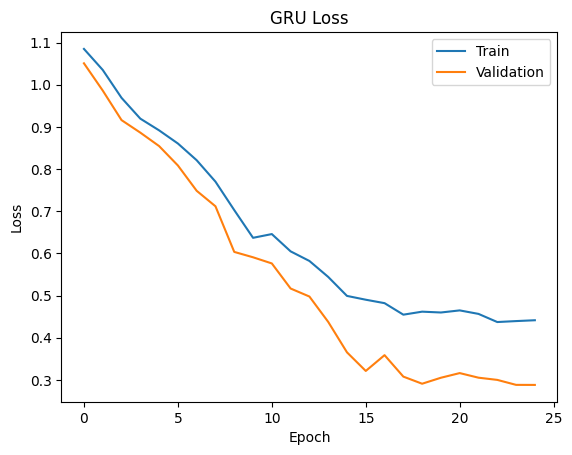

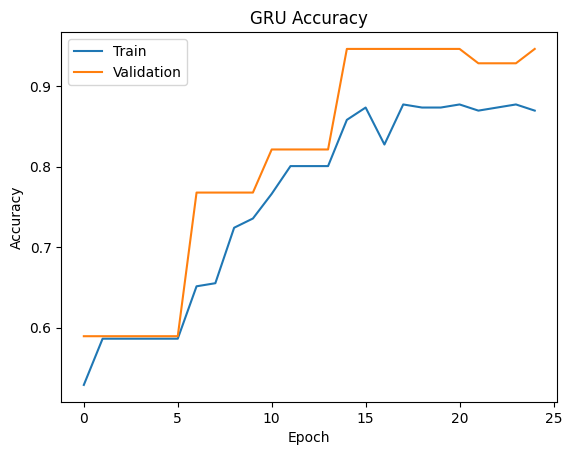

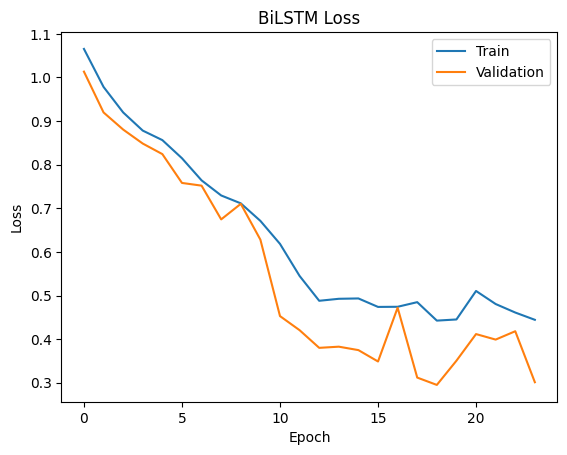

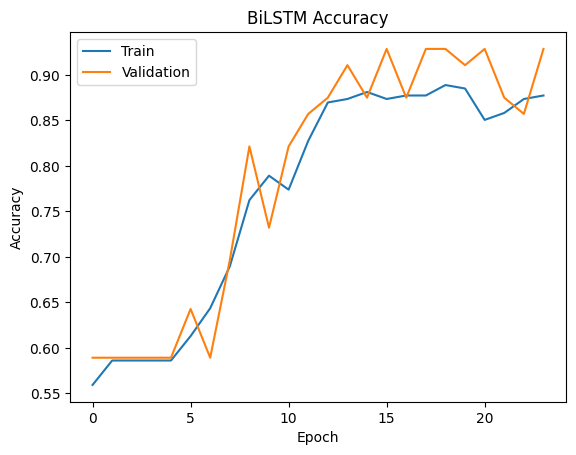


Best Model: SimpleRNN (val_acc=0.964)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
              precision    recall  f1-score   support

    Insomnia       1.00      0.83      0.91        12
        None       0.97      0.97      0.97        33
 Sleep Apnea       0.86      1.00      0.92        12

    accuracy                           0.95        57
   macro avg       0.94      0.93      0.93        57
weighted avg       0.95      0.95      0.95        57



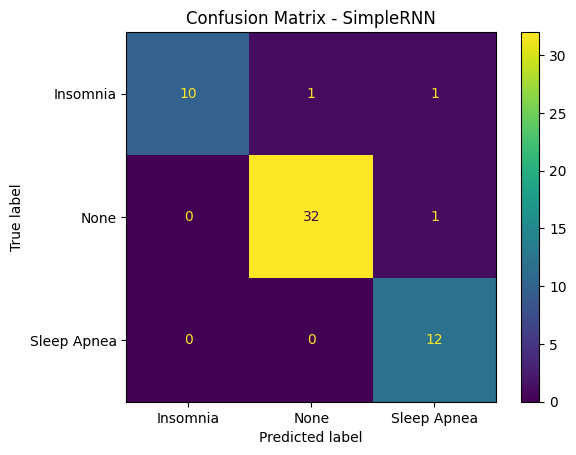

['saved_rnn/encoder.pkl']

In [ ]:
# rnn_sleep_models.py

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import joblib
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

CSV_PATH = '/content/Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv(CSV_PATH)

if 'Person ID' in df.columns:
    df = df.drop(columns=['Person ID'])

target_col = 'Sleep Disorder'
y_raw = df[target_col].fillna('None').astype(str)
X = df.drop(columns=[target_col])

cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

X[num_cols] = X[num_cols].fillna(X[num_cols].median())
X[cat_cols] = X[cat_cols].fillna('missing')

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])
X_proc = preprocessor.fit_transform(X)
X_proc = np.array(X_proc.todense())  # Ensure ndarray not matrix

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_raw)
num_classes = len(label_encoder.classes_)

X_temp, X_test, y_temp, y_test = train_test_split(
    X_proc, y, test_size=0.15, random_state=RANDOM_SEED, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.17647, random_state=RANDOM_SEED, stratify=y_temp)

seq_len = X_proc.shape[1]
X_train_seq = X_train.reshape((X_train.shape[0], seq_len, 1))
X_val_seq = X_val.reshape((X_val.shape[0], seq_len, 1))
X_test_seq = X_test.reshape((X_test.shape[0], seq_len, 1))

train_ds = tf.data.Dataset.from_tensor_slices(
    (X_train_seq.astype(np.float32),
     tf.keras.utils.to_categorical(y_train, num_classes))) \
    .shuffle(len(X_train_seq)).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = tf.data.Dataset.from_tensor_slices(
    (X_val_seq.astype(np.float32),
     tf.keras.utils.to_categorical(y_val, num_classes))) \
    .batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices(
    (X_test_seq.astype(np.float32),
     tf.keras.utils.to_categorical(y_test, num_classes))) \
    .batch(32)

def build_model(model_type):
    inp = layers.Input(shape=(seq_len, 1))
    if model_type == "SimpleRNN":
        x = layers.SimpleRNN(64)(inp)
    elif model_type == "LSTM":
        x = layers.LSTM(64)(inp)
    elif model_type == "GRU":
        x = layers.GRU(64)(inp)
    elif model_type == "BiLSTM":
        x = layers.Bidirectional(layers.LSTM(64))(inp)
    x = layers.Dense(32, activation='relu')(x)
    out = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inp, out, name=model_type)

def train_model(name):
    model = build_model(name)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    cb = [callbacks.EarlyStopping(monitor='val_loss',
                                 patience=5,
                                 restore_best_weights=True)]
    hist = model.fit(train_ds, validation_data=val_ds,
                     epochs=25, verbose=2, callbacks=cb)
    return model, hist

models_dict = {}
histories = {}

for m_name in ["SimpleRNN", "LSTM", "GRU", "BiLSTM"]:
    print(f"\nTraining {m_name}")
    model, hist = train_model(m_name)
    models_dict[m_name] = model
    histories[m_name] = hist

def plot_history(hist, name):
    # Loss
    plt.figure()
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title(f'{name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'])
    plt.show()
    # Accuracy
    plt.figure()
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title(f'{name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
    plt.show()

for name, h in histories.items():
    plot_history(h, name)

# Evaluate best model
best_model = None
best_acc = -1
for name, h in histories.items():
    val_acc = max(h.history['val_accuracy'])
    if val_acc > best_acc:
        best_acc = val_acc
        best_model = models_dict[name]
        best_name = name

print(f"\nBest Model: {best_name} (val_acc={best_acc:.3f})")

y_pred_prob = best_model.predict(X_test_seq)
y_pred = np.argmax(y_pred_prob, axis=1)

print(classification_report(y_test, y_pred,
                            target_names=label_encoder.classes_))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=label_encoder.classes_)
disp.plot()
plt.title(f'Confusion Matrix - {best_name}')
plt.show()

# Save models & processors
os.makedirs('saved_rnn', exist_ok=True)
best_model.save("saved_rnn/best_model.keras")
joblib.dump(preprocessor, 'saved_rnn/preprocessor.pkl')
joblib.dump(label_encoder, 'saved_rnn/encoder.pkl')

#Report of Recurrent Neural Networks
| Model     | Best Validation Accuracy | Notes                             |
| --------- | ------------------------ | --------------------------------- |
| SimpleRNN | **0.9643**               | Best performance, faster training |
| GRU       | 0.9464                   | Strong candidate, slightly behind |
| BiLSTM    | 0.9286                   | Good accuracy but inconsistent    |
| LSTM      | 0.8571                   | Struggled to converge well        |


| Class       | Precision | Recall | F1-score |
| ----------- | --------- | ------ | -------- |
| Insomnia    | 1.00      | 0.83   | 0.91     |
| None        | 0.97      | 0.97   | 0.97     |
| Sleep Apnea | 0.86      | 1.00   | 0.92     |

• LSTM struggled due to over-parameterization

• GRU and BiLSTM improved performance but increased training time

• SimpleRNN remained highly accurate with minimal complexity

• The results emphasize the importance of dataset size and task complexity in architecture selection

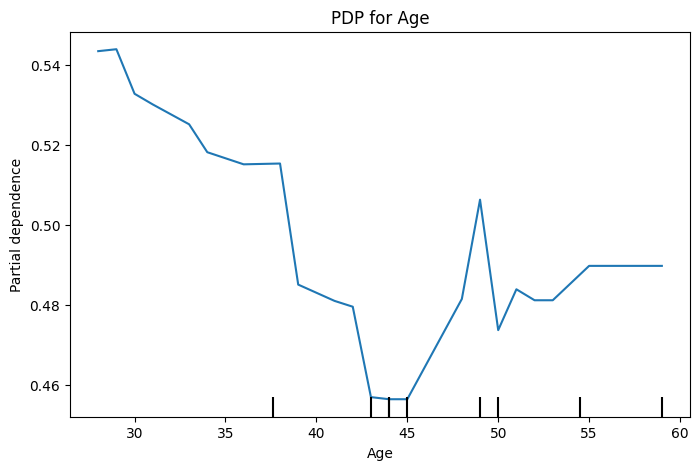

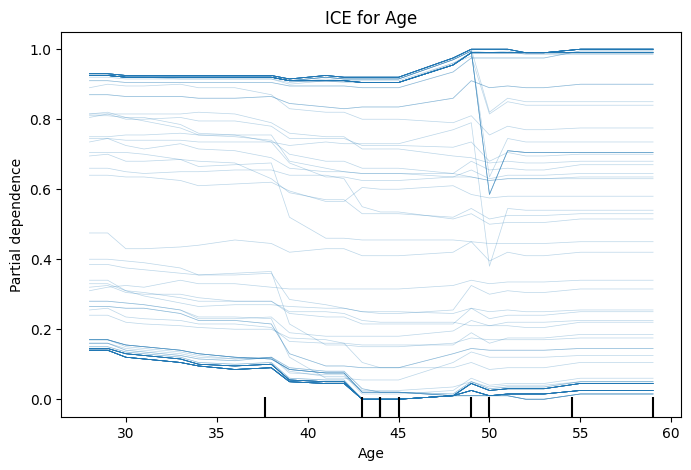

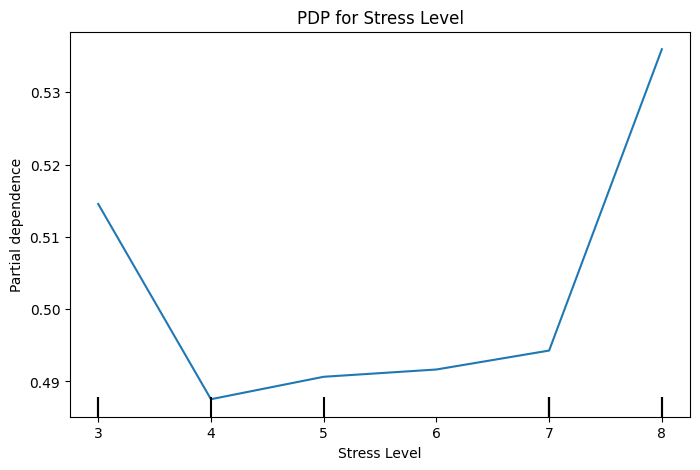

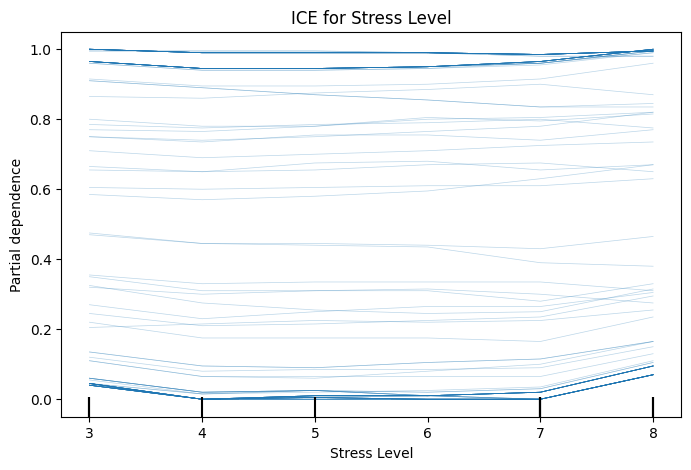

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.inspection import PartialDependenceDisplay

# 1. Load dataset
df = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")

# 2. Select target and features
target = "Sleep Disorder"
X = df.drop(columns=[target])
y = df[target]

# Remove rows with NaN values in the target variable
df.dropna(subset=[target], inplace=True)
X = df.drop(columns=[target])
y = df[target]


# 3. Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Preprocessing pipeline
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ]
)

# 5. Model
model = RandomForestClassifier(n_estimators=200, random_state=42)

pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('clf', model)
])

# Train model
pipeline.fit(X_train, y_train)

# 6. Choose features for PDP + ICE
features_to_plot = ["Age", "Stress Level"]  # <--- CHANGE this list as you want

# 7. Generate PDP + ICE plots
for feature in features_to_plot:
    fig, ax = plt.subplots(figsize=(8, 5))
    PartialDependenceDisplay.from_estimator(
        pipeline, X_train, [feature], kind="average", ax=ax
    )
    plt.title(f"PDP for {feature}")
    plt.show()

    fig, ax = plt.subplots(figsize=(8, 5))
    PartialDependenceDisplay.from_estimator(
        pipeline, X_train, [feature], kind="individual", ax=ax
    )
    plt.title(f"ICE for {feature}")
    plt.show()